In [43]:
#!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
#import conda_installer
#conda_installer.install()
#!/root/miniconda/bin/conda info -e

In [1]:
!pip install --pre deepchem

     |████████████████████████████████| 563kB 7.0MB/s 


In [2]:
!pip install pubchempy

  Created wheel for pubchempy: filename=PubChemPy-1.0.4-cp37-none-any.whl size=13825 sha256=33ce9708a61a640f1a9a977c144ae60504d107b68d198ba392d22fd6b7938901
  Stored in directory: /root/.cache/pip/wheels/10/4d/51/6b843681a9a5aef35f0d0fbce243de46f85080036e16118752
Successfully built pubchempy


In [8]:
import os
import pandas as pd
from pubchempy import get_cids, get_compounds
import os
from IPython.display import Image, display
import deepchem as dc
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np
import joblib

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: ignored

Mounted at /content/drive


In [5]:


c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')
c.keys()

dict_keys(['x41', 'case', 'yRefluxRate', 'yControl', 'yHeatDuty', 'vent_gas_x', 'distillate_x', 'sidedraw_x', 'bottoms_x', 'vent_gas_sf', 'distillate_sf', 'sidedraw_sf', 'bottoms_sf', 'density'])

In [6]:
comp_list = [ c['x41'][i].split('_')[-2] for  i in range(41)]

In [7]:
for i in comp_list:
  print(i,get_compounds(i, 'name')[0].canonical_smiles)

Hydrogen [HH]
Methane C
Ethane CC
Propane CCC
n-Butane CCCC
n-Pentane CCCCC
n-Hexane CCCCCC
Benzene C1=CC=CC=C1
Cyclohexane C1CCCCC1
n-Heptane CCCCCCC
Water O
Methylcyclohexane CC1CCCCC1
Toluene CC1=CC=CC=C1
n-Octane CCCCCCCC
n-Propylcyclopentane CCCC1CCCC1
Ethylcyclohexane CCC1CCCCC1
Ethylbenzene CCC1=CC=CC=C1
p-Xylene CC1=CC=C(C=C1)C
m-Xylene CC1=CC(=CC=C1)C
o-Xylene CC1=CC=CC=C1C
n-Nonane CCCCCCCCC
i-Propylbenzene CC(C)C1=CC=CC=C1
n-Propylcyclohexane CCCC1CCCCC1
n-Propylbenzene CCCC1=CC=CC=C1
1-Methyl-3-ethylbenzene CCC1=CC=CC(=C1)C
1-Methyl-4-ethylbenzene CCC1=CC=C(C=C1)C
1,3,5-Trimethylbenzene CC1=CC(=CC(=C1)C)C
1-Methyl-2-ethylbenzene CCC1=CC=CC=C1C
1,2,4-Trimethylbenzene CC1=CC(=C(C=C1)C)C
tert-Butylcyclohexane CC(C)(C)C1CCCCC1
1,2,3-Trimethylbenzene CC1=C(C(=CC=C1)C)C
Indane C1CC2=CC=CC=C2C1
1-Methyl-4-n-propylbenzene CCCC1=CC=C(C=C1)C
1,2-Diethylbenzene CCC1=CC=CC=C1CC
5-Ethyl-m-xylene CCC1=CC(=CC(=C1)C)C
1,4-Diethylbenzene CCC1=CC=C(C=C1)CC
1,2,3,5-Tetramethylbenzene CC1=CC(=

RDKit WARNING: [05:27:44] WARNING: not removing hydrogen atom without neighbors


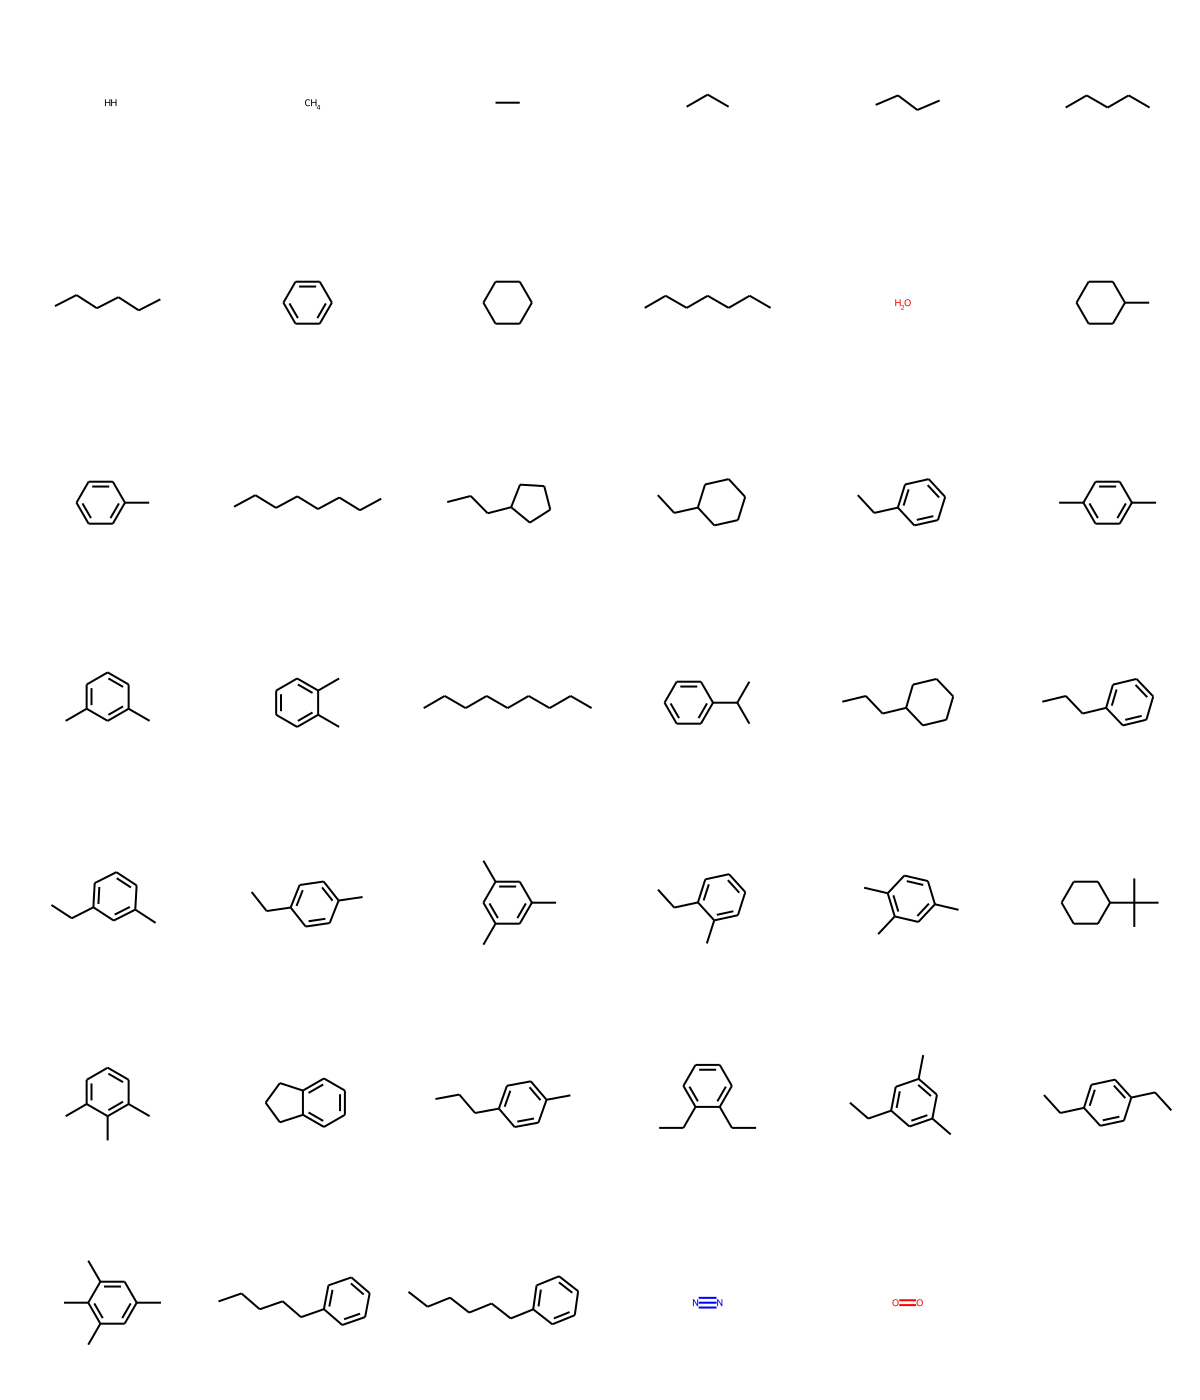

In [35]:
Draw._MolsToGridImage([Chem.MolFromSmiles(get_compounds(i, 'name')[0].canonical_smiles) for i in comp_list[:41]], molsPerRow=6)